In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Loading the dataset
data = fetch_olivetti_faces()
X, y = data.data, data.target

In [3]:
# Splitting the dataset into training, validation, and test sets using stratified sampling
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=39)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=39)

In [4]:
# Applying PCA to preserve 99% of the variance 
pca = PCA(n_components=0.99, random_state=39)  
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

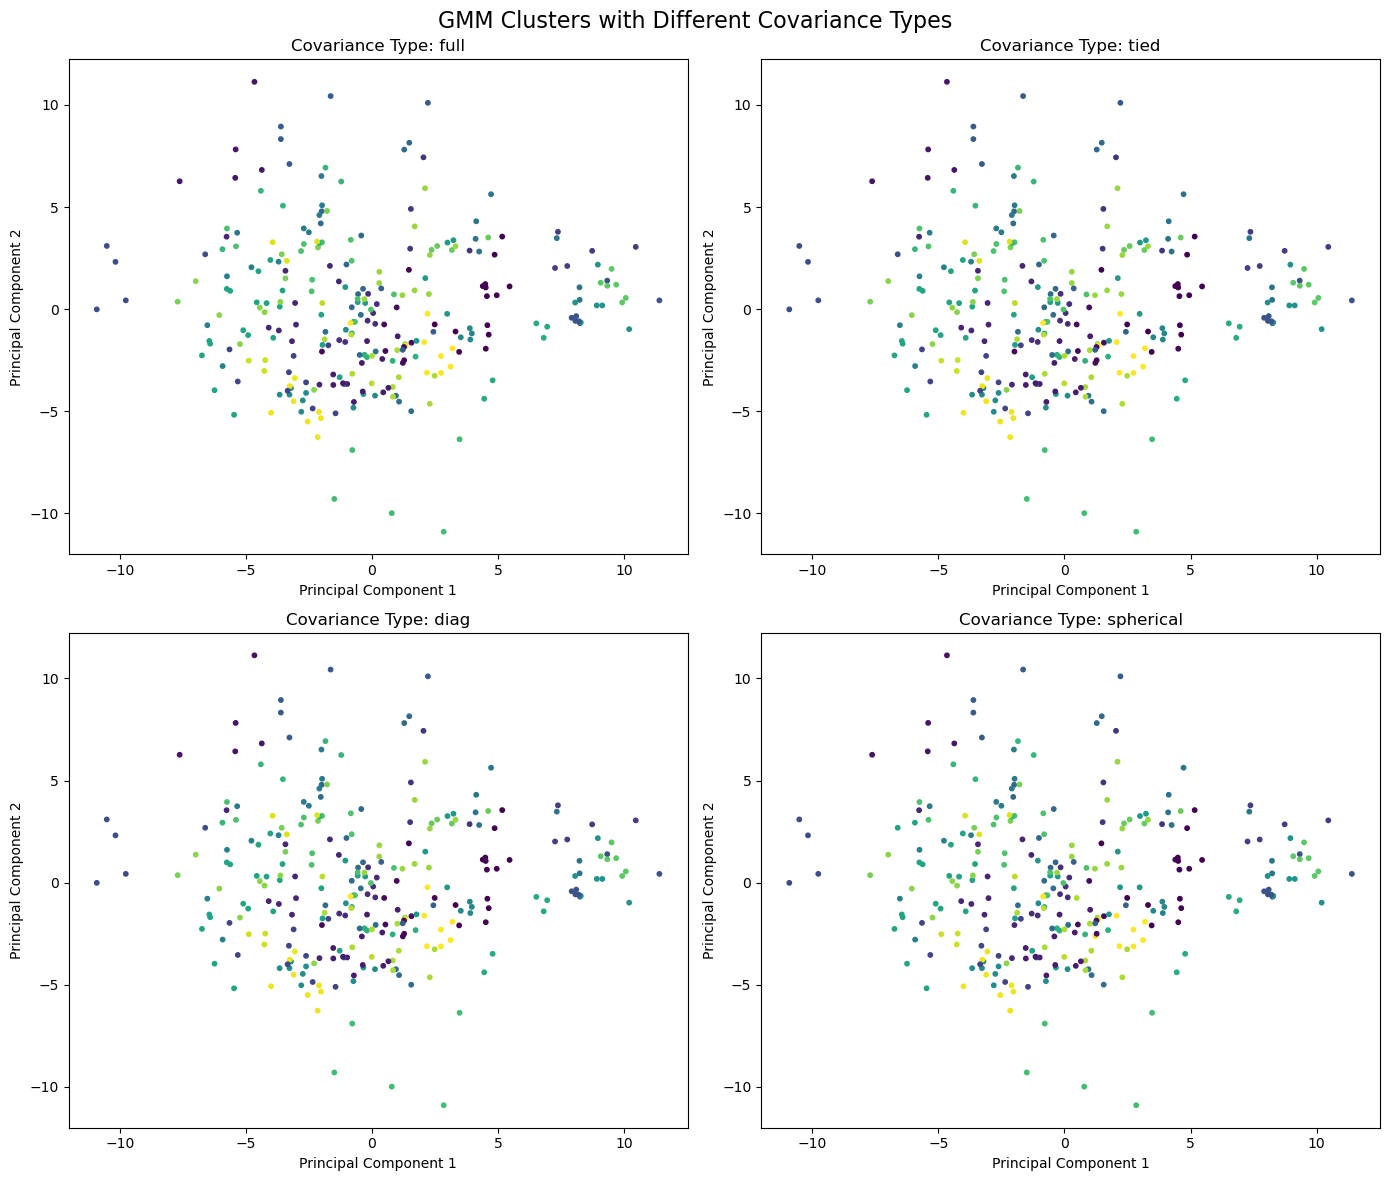

Best covariance type: spherical


In [5]:
# Determining the most suitable covariance type for the dataset and visualize the clusters
covariance_types = ['full', 'tied', 'diag', 'spherical']
best_bic = np.inf
best_gmm = None

fig, axs = plt.subplots(2, 2, figsize=(14, 12))  # Create a 2x2 grid for the plots

for i, cov_type in enumerate(covariance_types):
    gmm = GaussianMixture(n_components=40, covariance_type=cov_type, random_state=39)
    gmm.fit(X_train_pca)
    bic = gmm.bic(X_val_pca)
    
    if bic < best_bic:
        best_bic = bic
        best_gmm = gmm

    # Getting the cluster labels for visualization
    labels = gmm.predict(X_train_pca)
    
    # Plot the clusters for this covariance type
    row, col = divmod(i, 2)  # Determine the subplot location
    axs[row, col].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels, cmap='viridis', s=10)
    axs[row, col].set_title(f"Covariance Type: {cov_type}")
    axs[row, col].set_xlabel("Principal Component 1")
    axs[row, col].set_ylabel("Principal Component 2")

plt.suptitle("GMM Clusters with Different Covariance Types", fontsize=16)
plt.tight_layout()
plt.show()

print(f"Best covariance type: {best_gmm.covariance_type}")


In [6]:
# Determining the minimum number of clusters using BIC
n_components = np.arange(1, 41)  # Range of clusters
bic_scores = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, covariance_type=best_gmm.covariance_type, random_state=39)
    gmm.fit(X_train_pca)
    bic_scores.append(gmm.bic(X_val_pca))

best_n_clusters = n_components[np.argmin(bic_scores)]
print(f"Best number of clusters: {best_n_clusters}")

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

Best number of clusters: 4


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


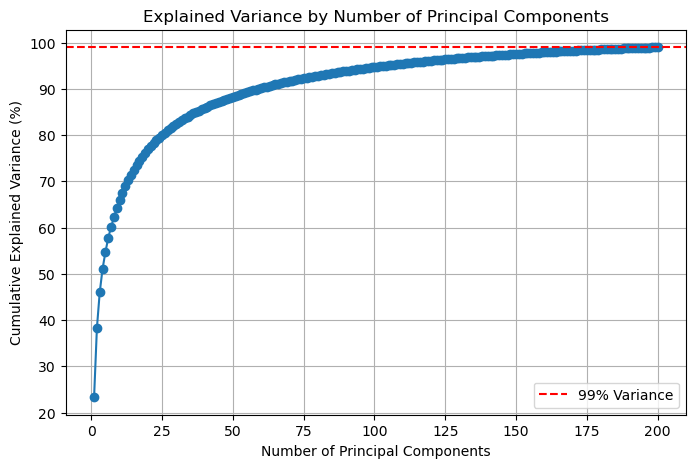

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting Explained Variance for PCA
# Cumulative explained variance

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("Explained Variance by Number of Principal Components")
plt.axhline(y=99, color='r', linestyle='--', label='99% Variance')
plt.legend()
plt.grid()
plt.show()

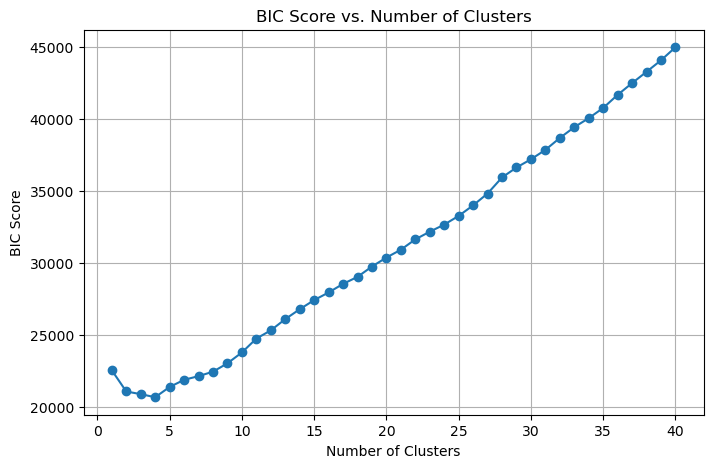

In [8]:
# Plotting BIC Scores for Different Number of Clusters
plt.figure(figsize=(8, 5))
plt.plot(n_components, bic_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("BIC Score")
plt.title("BIC Score vs. Number of Clusters")
plt.grid()
plt.show()

In [9]:
# Outputing the hard clustering assignments
gmm_best = GaussianMixture(n_components=best_n_clusters, covariance_type=best_gmm.covariance_type, random_state=39)
gmm_best.fit(X_train_pca)
hard_labels = gmm_best.predict(X_test_pca)

print(f"Hard Clustering Assignments (Test set): {hard_labels}")

Hard Clustering Assignments (Test set): [3 2 0 3 1 2 1 0 1 3 1 2 1 1 2 0 2 3 3 0 1 2 1 2 1 1 1 3 1 2 1 3 1 1 0 3 1
 3 0 2 3 0 0 2 2 1 0 2 1 3 1 3 2 1 2 2 3 1 1 2]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [10]:
# Outputing the soft clustering probabilities
soft_probabilities = gmm_best.predict_proba(X_test_pca)
print(f"Soft Clustering Probabilities (Test set):\n{soft_probabilities}")

Soft Clustering Probabilities (Test set):
[[1.21880813e-093 3.06095287e-040 4.02194134e-065 1.00000000e+000]
 [2.20843158e-096 2.32532357e-030 1.00000000e+000 2.91709661e-040]
 [1.00000000e+000 1.73155974e-075 1.40145205e-103 1.63778719e-112]
 [4.12968412e-025 1.32665937e-030 3.73165400e-019 1.00000000e+000]
 [1.87421633e-003 9.98125784e-001 2.45255332e-037 1.18280746e-045]
 [1.59701313e-119 2.95039835e-052 1.00000000e+000 1.90362032e-026]
 [1.71037381e-048 6.11288144e-001 8.34879790e-017 3.88711856e-001]
 [1.00000000e+000 1.56306359e-065 1.26205169e-106 2.00831474e-078]
 [6.70752245e-070 1.00000000e+000 1.69319930e-025 1.71519517e-010]
 [8.13394746e-054 7.53906950e-009 9.02011352e-027 9.99999992e-001]
 [3.96704419e-017 1.00000000e+000 6.94353043e-026 1.27732780e-025]
 [7.92639052e-036 7.25248079e-024 1.00000000e+000 5.06297873e-054]
 [2.18788584e-032 1.00000000e+000 6.04090499e-012 4.95063808e-043]
 [2.26081342e-025 1.00000000e+000 2.70354764e-032 7.91296791e-018]
 [2.30861796e-183 6.

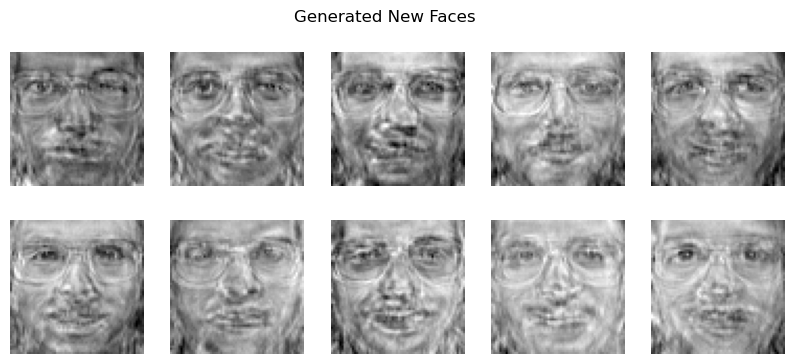

In [11]:
# Generating new faces using the model's sample() method and visualize them
generated_faces, _ = gmm_best.sample(10)
generated_faces_original = pca.inverse_transform(generated_faces)

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_faces_original[i].reshape(64, 64), cmap='gray')
    plt.axis('off')
plt.suptitle('Generated New Faces')
plt.show()

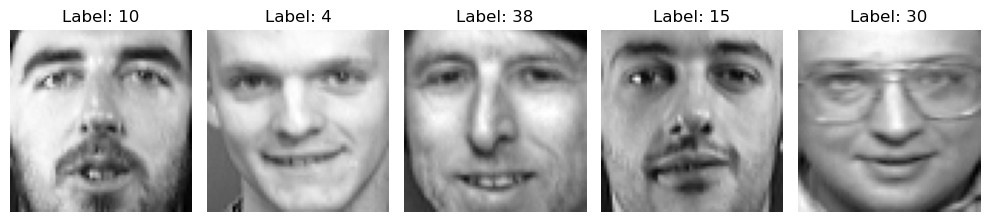

In [12]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 5

# Plotting a few images from X_test
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(X_test[i].reshape(64, 64), cmap='gray')  
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


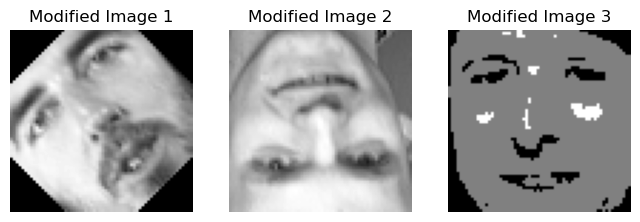

In [13]:
#Modifying some images (rotate, flip, darken)

from scipy.ndimage import rotate
import cv2

X_test_modified = X_test.copy()
# Rotate first image by 45 degrees
X_test_modified[0] = rotate(X_test[0].reshape(64, 64), angle=45, reshape=False).ravel()
# Flip second image horizontally
X_test_modified[1] = np.flip(X_test[1].reshape(64, 64)).ravel()
# Darken third image
X_test_modified[2] = cv2.convertScaleAbs(X_test[2].reshape(64, 64), alpha=3.5, beta=3.5).ravel()

# Visualize modified images
plt.figure(figsize=(8, 3))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_test_modified[i].reshape(64, 64), cmap='gray')
    plt.title(f"Modified Image {i+1}")
    plt.axis('off')
plt.show()

In [14]:
#Detecting anomalies by comparing score_samples between normal and modified images
# Score samples on original test images
log_likelihood_normal = gmm_best.score_samples(pca.transform(X_test))

# Score samples on modified images
log_likelihood_modified = gmm_best.score_samples(pca.transform(X_test_modified))

print(f"Log-likelihood of normal test images: {log_likelihood_normal[:5]}")
print(f"Log-likelihood of modified images: {log_likelihood_modified[:3]}")

Log-likelihood of normal test images: [-128.67479512 -108.93558605 -115.50767216 -206.02490909 -116.20714326]
Log-likelihood of modified images: [   -489.81452637    -240.51824088 -124008.12360889]


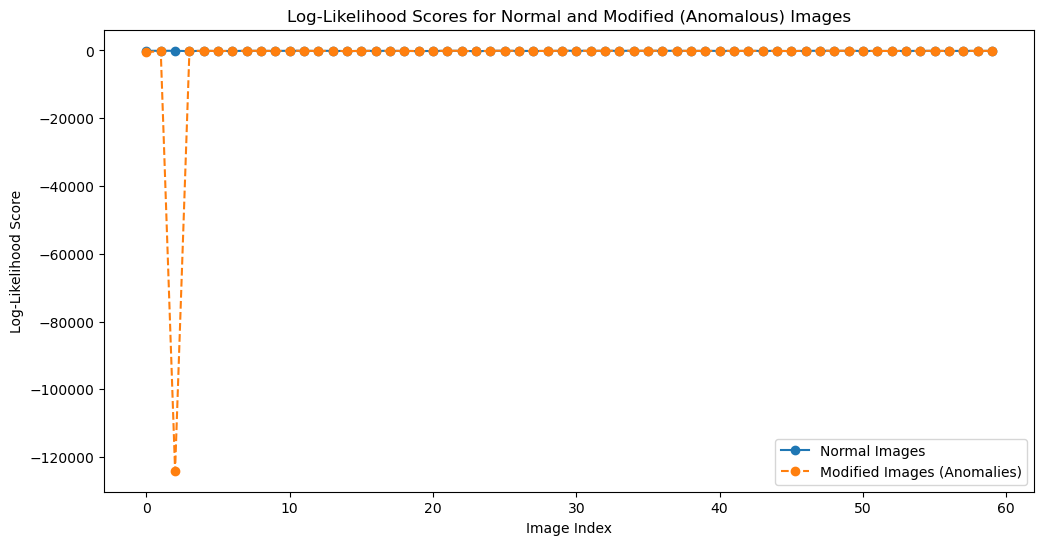

In [15]:
# Plotting the log-likelihood scores for normal and modified images
plt.figure(figsize=(12, 6))
plt.plot(log_likelihood_normal, label="Normal Images", marker='o')
plt.plot(log_likelihood_modified, label="Modified Images (Anomalies)", marker='o', linestyle='--')
plt.xlabel("Image Index")
plt.ylabel("Log-Likelihood Score")
plt.title("Log-Likelihood Scores for Normal and Modified (Anomalous) Images")
plt.legend()
plt.show()